In [48]:
# !pip install seaborn
# !pip install nltk
#Import all the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns
import re
from collections import Counter, defaultdict
# from wordcloud import WordCloud

In [49]:
file_list = ('ECOOP22_recent_1655419667.json', 'ECOOP22_recent_1655142580.json','ECOOP22_recent_1655049159.json','ECOOP22_recent_1654984130.json','ECOOP22_recent_1654910819.json')
ecoop_tweets = []
for path in file_list:
    with open(path) as f:
        loaded_tweets = json.load(f)
        print(f"Loaded {len(loaded_tweets)} tweets from '{path}'")
        ids = [t['id'] for t in ecoop_tweets]
        for t in loaded_tweets:
            if t['id'] not in ids:
                ecoop_tweets.append(t)
        print(f"Gathered {len(ecoop_tweets)} tweets")

Loaded 172 tweets from 'ECOOP22_recent_1655419667.json'
Gathered 172 tweets
Loaded 193 tweets from 'ECOOP22_recent_1655142580.json'
Gathered 216 tweets
Loaded 189 tweets from 'ECOOP22_recent_1655049159.json'
Gathered 220 tweets
Loaded 187 tweets from 'ECOOP22_recent_1654984130.json'
Gathered 221 tweets
Loaded 190 tweets from 'ECOOP22_recent_1654910819.json'
Gathered 228 tweets


In [50]:
def is_RT(tweet):
    if 'retweeted_status' not in tweet:
        return False      
    else:
        return True

def is_Reply_to(tweet):
    if 'in_reply_to_screen_name' not in tweet:
        return False      
    else:
        return tweet['in_reply_to_screen_name']

tweets = pd.DataFrame()
tweets['text'] = list(map(lambda tweet: tweet['full_text'] if 'extended_tweet' not in tweet else tweet['extended_tweet']['full_text'], ecoop_tweets))
tweets['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], ecoop_tweets))
# tweets['timestamp'] = list(map(lambda tweet: tweet['created_at'], ecoop_tweets))
tweets['length'] = list(map(lambda tweet: len(tweet['full_text']) if'extended_tweet' not in tweet else len(tweet['extended_tweet']['full_text']), ecoop_tweets))
# tweets['location'] = list(map(lambda tweet: tweet['user']['location'], ecoop_tweets))
tweets['RT'] = list(map(is_RT, ecoop_tweets))
tweets['Reply'] = list(map(is_Reply_to, ecoop_tweets))
tweets['favorites'] = list(map(lambda tweet: tweet['favorite_count'], ecoop_tweets))
tweets['retweets'] = list(map(lambda tweet: tweet['retweet_count'], ecoop_tweets))
tweets['url'] = list(map(lambda t: f"https://twitter.com/{t['user']['screen_name']}/{t['id_str']}", ecoop_tweets))

In [51]:
tweets.head()

,text,Username,length,RT,Reply,favorites,retweets,url
0,"RT @tvdstorm: Two great sessions of @ECOOPconf VCOOP concluded. On to the keynote of @guidosalva! ""Are Programming Languages the Key to Dis…",ECOOPconf,140,True,None,0,1,https://twitter.com/ECOOPconf/1537513800718491651
1,"Makes us think we should have also designed some near #ECOOP22 style custom graphics for awards... 🖼\nNice job, @diunito! And congrats to the authors! https://t.co/S1ws4Xl94Z",ECOOPconf,173,False,None,5,0,https://twitter.com/ECOOPconf/1537513675346567173
2,"RT @ECOOPconf: We're looking forward to @guidosalva's keynote on ""Are Programming Languages the Key to Distributed Systems?"" today at VCOOP…",tvdstorm,140,True,None,0,1,https://twitter.com/tvdstorm/1537470970671288324
3,"Two great sessions of @ECOOPconf VCOOP concluded. On to the keynote of @guidosalva! ""Are Programming Languages the Key to Distributed Systems?"" (https://t.co/8AwjQ1ZyfY) #ecoop22 #pl #distributedsystems",tvdstorm,202,False,None,1,1,https://twitter.com/tvdstorm/1537470927864479744
4,"We're looking forward to @guidosalva's keynote on ""Are Programming Languages the Key to Distributed Systems?"" today at VCOOP'22! Happening soon! #ECOOP22\nhttps://t.co/rXchRLKy5z https://t.co/QxWYLQ2EKK",ECOOPconf,202,False,None,3,1,https://twitter.com/ECOOPconf/1537468796113457152


In [52]:
print(f"There are {tweets['Username'].nunique()} unique users in the dataset")

There are 93 unique users in the dataset


In [53]:
favorite_sorted_tweets = tweets.sort_values('favorites', ascending=False)
pd.set_option('display.max_colwidth', None)
favorite_sorted_tweets[['favorites','text','url']].head(10)

,favorites,text,url
164,74,"The #ECOOP22 paper ""How to Take the Inverse of a Type"" by Daniel Marshall, Dominic Orchard received both a Distinguished Paper AND a Distinguished Artifact Award! Congratulations to the authors!👏 @dorchard @UniKentComp\n🔗: https://t.co/AqoQ60cMNE\n📄: https://t.co/e44ybJxZws https://t.co/BrJ0mSNkDe",https://twitter.com/ECOOPconf/1534445373862731776
115,55,"Congratulations, Dan Ingalls, on receiving the AITO Dahl-Nygaard Senior Prize! 👏🏆 @daningalls #ECOOP22 https://t.co/c7dCEzD0pp https://t.co/eK1tVEtd0E",https://twitter.com/ECOOPconf/1534871641435811841
81,49,"We might be biased, but we think that ""What we eval in the shadows: a large-scale study of eval in R programs"" is a pretty neat paper title! 🥷🧑‍💻\n#ECOOP22 @j_v_66 @christophkirsch \n🔗: https://t.co/Qv071bBf7a\n📄: https://t.co/vGLCMAhn3A https://t.co/KaIOII8xlH",https://twitter.com/ECOOPconf/1535256719529500674
136,39,"We would like to take this opportunity to share some of James Noble's wisdom, presented at #ECOOP22's FTfJP workshop 😛 https://t.co/92mmVNtFPO https://t.co/UEV2SSsUyK",https://twitter.com/ECOOPconf/1534648966083756033
33,38,A huge thank you to our amazing group of #ECOOP22 Student Volunteers who supported the conference in Berlin! 👏🙏 We hope to see you again at VCOOP! @j_dsing @christofsteel https://t.co/vQkozvHajP,https://twitter.com/ECOOPconf/1535747917058801664
195,29,📣The #ECOOP22 awards are announced!\n\n🏆 The Senior Dahl-Nygaard Prize goes to @daningalls!\n🏆 The Junior Dahl-Nygaard Prize goes to @MagnusMadsenDK! \n🏆 The 2022 AITO Test of Time Award is presented to Yoonsik Cheon &amp; @gary_leavens!\n\nCongratulations! 👏\nhttps://t.co/7O5hyvem4E,https://twitter.com/ECOOPconf/1534065117620342784
37,26,On my way home from #ecoop22. Have seen so many faces again and met so many new people. Happy to return to a normal sleep cycle. It's been a blast! Let's do this again. But maybe not in the next week. 😅 https://t.co/tY3NwcN3wk,https://twitter.com/benhermann/1535559375078793216
179,25,Our PRIDE workshop at #ecoop22 ended up with nice group pictures of all speakers. It was such a great experience for me! It was really fun and there were so many inspirations I got from the talks. Thanks everyone who contributed to the workshop! https://t.co/Ijh0XwbLcu https://t.co/nEEX8f2ZCi,https://twitter.com/LinghuiLuo/1534241511625351168
144,23,"Congratulations again, @gary_leavens &amp; Yoonsik Cheon, on receiving the #ECOOP22 AITO Test of Time Award for the paper ""A Simple and Practical Approach to Unit Testing: The JML and JUnit Way"" (ECOOP 2002)! 🏅\nhttps://t.co/PWOdXxK5Wu https://t.co/zrJtcBnHZP",https://twitter.com/ECOOPconf/1534617858130468866
99,19,We presented and discussed a new contribution for RPython and #PyPy at @ICOOOLPS co-located with #ECOOP22. Great in-person experiences. https://t.co/JgvU2i1Cua,https://twitter.com/yusuke_izawa/1534994903054176256


In [54]:
retweet_sorted_tweets = tweets[~tweets['RT']].sort_values('retweets', ascending=False)
retweet_sorted_tweets[['retweets','text','url']].head(10)

,retweets,text,url
115,14,"Congratulations, Dan Ingalls, on receiving the AITO Dahl-Nygaard Senior Prize! 👏🏆 @daningalls #ECOOP22 https://t.co/c7dCEzD0pp https://t.co/eK1tVEtd0E",https://twitter.com/ECOOPconf/1534871641435811841
164,12,"The #ECOOP22 paper ""How to Take the Inverse of a Type"" by Daniel Marshall, Dominic Orchard received both a Distinguished Paper AND a Distinguished Artifact Award! Congratulations to the authors!👏 @dorchard @UniKentComp\n🔗: https://t.co/AqoQ60cMNE\n📄: https://t.co/e44ybJxZws https://t.co/BrJ0mSNkDe",https://twitter.com/ECOOPconf/1534445373862731776
136,8,"We would like to take this opportunity to share some of James Noble's wisdom, presented at #ECOOP22's FTfJP workshop 😛 https://t.co/92mmVNtFPO https://t.co/UEV2SSsUyK",https://twitter.com/ECOOPconf/1534648966083756033
81,8,"We might be biased, but we think that ""What we eval in the shadows: a large-scale study of eval in R programs"" is a pretty neat paper title! 🥷🧑‍💻\n#ECOOP22 @j_v_66 @christophkirsch \n🔗: https://t.co/Qv071bBf7a\n📄: https://t.co/vGLCMAhn3A https://t.co/KaIOII8xlH",https://twitter.com/ECOOPconf/1535256719529500674
227,8,Not that long anymore until #ECOOP22 starts! We will kick off things on June 6th in Berlin with a keynote by the lead designer of Scala @odersky!\nhttps://t.co/jzwOeiw8Tt https://t.co/YenAnzMu0Q,https://twitter.com/ECOOPconf/1532382348565790720
195,7,📣The #ECOOP22 awards are announced!\n\n🏆 The Senior Dahl-Nygaard Prize goes to @daningalls!\n🏆 The Junior Dahl-Nygaard Prize goes to @MagnusMadsenDK! \n🏆 The 2022 AITO Test of Time Award is presented to Yoonsik Cheon &amp; @gary_leavens!\n\nCongratulations! 👏\nhttps://t.co/7O5hyvem4E,https://twitter.com/ECOOPconf/1534065117620342784
21,5,"VCOOP tip #2: Registration for #VCOOP22 is only 25 EUR, and is also included in the regular #ECOOP22 registration. Remember: ECOOP is Europe's leading academic conference on programming. Whether you're in industry or academia, join us!\nhttps://t.co/OYBDqIZnGc\n@tvdstorm @ECOOPconf",https://twitter.com/philippkhaller/1536608706485534721
28,5,"VCOOP tip #1: Following the successful in-person #ECOOP22 in Berlin, #VCOOP22 features virtual presentations of ECOOP research papers as well as keynotes. It takes place June 16, June 23, June 30, and July 7, 15:00-19:00 CEST (=UTC+2).\nhttps://t.co/yNkO9yQnsr\n@tvdstorm @ECOOPconf",https://twitter.com/philippkhaller/1536326514832179200
179,5,Our PRIDE workshop at #ecoop22 ended up with nice group pictures of all speakers. It was such a great experience for me! It was really fun and there were so many inspirations I got from the talks. Thanks everyone who contributed to the workshop! https://t.co/Ijh0XwbLcu https://t.co/nEEX8f2ZCi,https://twitter.com/LinghuiLuo/1534241511625351168
99,4,We presented and discussed a new contribution for RPython and #PyPy at @ICOOOLPS co-located with #ECOOP22. Great in-person experiences. https://t.co/JgvU2i1Cua,https://twitter.com/yusuke_izawa/1534994903054176256


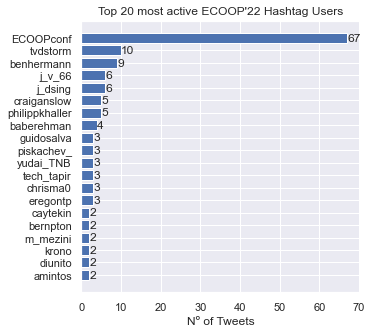

In [55]:
usertweets = tweets.groupby('Username')
#Top tweeting users
top_users = usertweets.count()['text'].sort_values(ascending = False)[:20].to_dict()

fig, ax = plt.subplots(figsize = (5,5))
sns.set_theme()
y_pos = np.arange(len(top_users.keys()))
ax.barh(y_pos, top_users.values(), align='center')
ax.set_yticks(y_pos, labels=top_users.keys())
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Nº of Tweets")
ax.set_title("Top 20 most active ECOOP'22 Hashtag Users")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()


In [56]:
#See the percentage of tweets from the initial set that are retweets
RT_tweets = tweets[tweets['RT'] == True]
print(f"The percentage of retweets is {round(len(RT_tweets)/len(tweets)*100)}% of all the tweets")
RT_tweets.head()

The percentage of retweets is 61% of all the tweets


,text,Username,length,RT,Reply,favorites,retweets,url
0,"RT @tvdstorm: Two great sessions of @ECOOPconf VCOOP concluded. On to the keynote of @guidosalva! ""Are Programming Languages the Key to Dis…",ECOOPconf,140,True,None,0,1,https://twitter.com/ECOOPconf/1537513800718491651
2,"RT @ECOOPconf: We're looking forward to @guidosalva's keynote on ""Are Programming Languages the Key to Distributed Systems?"" today at VCOOP…",tvdstorm,140,True,None,0,1,https://twitter.com/tvdstorm/1537470970671288324
5,RT @ECOOPconf: In the second session of VCOOP'22 today:\n\n* Direct Foundations for Compositional Programming\n* Experience: Model-Based Feedb…,tvdstorm,140,True,None,0,1,https://twitter.com/tvdstorm/1537445060744056832
8,"RT @tvdstorm: In less than an hour, the first issue of @ECOOPconf's virtual sibling VCOOP is starting! We have an exciting line-up, with a…",philippkhaller,139,True,None,0,1,https://twitter.com/philippkhaller/1537409903865872386
11,"RT @ECOOPconf: The in-person #ECOOP22 has concluded.\nThat means VCOOP'22, the virtual conference component, is right around the corner! 🧑‍💻…",tvdstorm,140,True,None,0,2,https://twitter.com/tvdstorm/1537158427235041281


In [57]:
#See the percentage of tweets from the initial set that are replies to tweets of another user:
Reply_tweets = tweets[tweets['Reply'].apply(type) == str]
print(f"The percentage of replies is {round(len(Reply_tweets)/len(tweets)*100)}% of all the tweets")
Reply_tweets.head()

The percentage of replies is 1% of all the tweets


,text,Username,length,RT,Reply,favorites,retweets,url
83,"@craiganslow @soundasleep @j_v_66 #ECOOP22 in general is an in-person event so we did not do recordings / live-streams. However, we attempted an inpromptu recording of Dan's talk. Give us a bit of time to see if this worked out and then we'll announce through our usual channels.",benhermann,279,False,craiganslow,4,0,https://twitter.com/benhermann/1535236395047976960
184,@LinghuiLuo gives a tutorial on MagpieBridge at the PRIDE Workshop @ECOOPconf #ecoop22 https://t.co/MrWwXhoNKK,piskachev_,110,False,LinghuiLuo,7,0,https://twitter.com/piskachev_/1534174772061425664


In [58]:
#Percentage of tweets from the initial set that have mentions and are not retweets:
mention_tweets = tweets[~tweets['text'].str.contains("RT") & tweets['text'].str.contains("@")]
print(f"The percentage of mentions is {round(len(mention_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of mentions is 23% of all the tweets


In [59]:
#Tweets that are plain text tweets (No RT or mention)
plain_text_tweets = tweets[~tweets['text'].str.contains("@") & ~tweets['text'].str.contains("RT")]
print(f"The percentage of plain text tweets is {round(len(plain_text_tweets)/len(tweets)*100)}% of all the tweets")

The percentage of plain text tweets is 14% of all the tweets


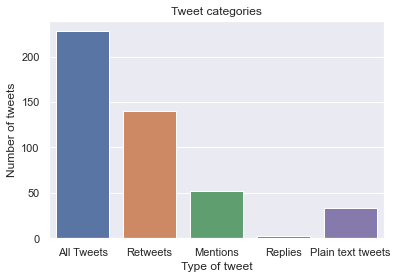

In [60]:
#Now we will plot all the different categories. Note that the reply #tweets are inside the mention tweets
len_list = [len(tweets), len(RT_tweets),len(mention_tweets), len(Reply_tweets), len(plain_text_tweets)]
item_list = ['All Tweets','Retweets', 'Mentions', 'Replies', 'Plain text tweets']
plt.figure()
sns.set_theme()
plt.title('Tweet categories')
plt.xlabel('Type of tweet')
plt.ylabel('Number of tweets')
sns.barplot(x=item_list, y=len_list)

plt.show()

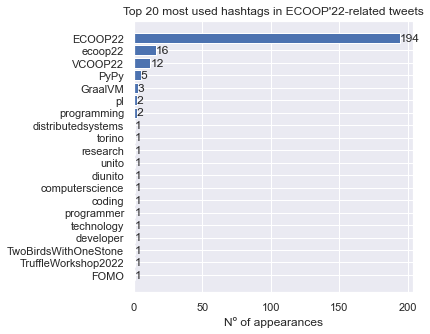

In [61]:
hashtags = Counter()
for tweet in ecoop_tweets:
    if ht_list := tweet['entities']['hashtags']:
        for ht_element in ht_list:
            hashtags.update({ht_element['text']: 1})
most_common = hashtags.most_common(20)

fig, ax = plt.subplots(figsize = (5,5))
y_pos = np.arange(len(most_common))
ax.barh(y_pos, [e[1] for e in most_common], align='center')
ax.set_yticks(y_pos, labels=[e[0] for e in most_common])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Nº of appearances")
ax.set_title("Top 20 most used hashtags in ECOOP'22-related tweets")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()


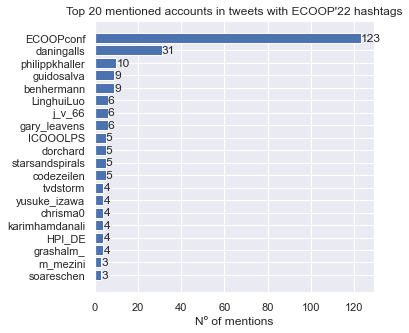

In [62]:
user_mentions = Counter()
for tweet in ecoop_tweets:
    if m_list := tweet['entities']['user_mentions']:
        for m_element in m_list:
            user_mentions.update({m_element['screen_name']: 1})
most_common = user_mentions.most_common(20)

fig, ax = plt.subplots(figsize = (5,5))
sns.set_theme()
y_pos = np.arange(len(most_common))
ax.barh(y_pos, [e[1] for e in most_common], align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels([e[0] for e in most_common])
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel("Nº of mentions")
ax.set_title("Top 20 mentioned accounts in tweets with ECOOP'22 hashtags")
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()